In [6]:
import torch
from transformers import Owlv2Processor, Owlv2ForObjectDetection


In [7]:
import requests
from PIL import Image


processor = Owlv2Processor.from_pretrained("google/owlv2-base-patch16-ensemble")
model = Owlv2ForObjectDetection.from_pretrained("google/owlv2-base-patch16-ensemble")


In [3]:

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
texts = [["a photo of a cat", "a photo of a dog"]]
inputs = processor(text=texts, images=image, return_tensors="pt")
outputs = model(**inputs)

# Target image sizes (height, width) to rescale box predictions [batch_size, 2]
# target_sizes = torch.Tensor([image.size[::-1]])
target_sizes = torch.Tensor([image.size[::-1]])
# Convert outputs (bounding boxes and class logits) to Pascal VOC Format (xmin, ymin, xmax, ymax)
results = processor.post_process_object_detection(outputs=outputs, target_sizes=target_sizes, threshold=0.1)
i = 0  # Retrieve predictions for the first image for the corresponding text queries
text = texts[i]
boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]
for box, score, label in zip(boxes, scores, labels):
    box = [round(i, 2) for i in box.tolist()]
    print(f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}")

model.safetensors:   0%|          | 0.00/620M [00:00<?, ?B/s]

Detected a photo of a cat with confidence 0.614 at location [341.67, 23.39, 642.32, 371.35]
Detected a photo of a cat with confidence 0.665 at location [6.75, 51.96, 326.62, 473.13]


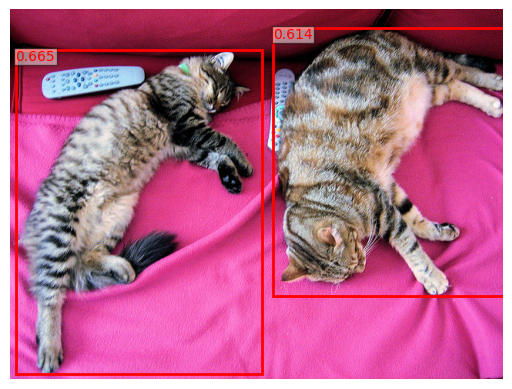

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import requests
from PIL import Image
from io import BytesIO

# Image URL
url = "http://images.cocodataset.org/val2017/000000039769.jpg"

# Bounding box coordinates and confidence levels
boxes = [
    [341.67, 23.39, 642.32, 371.35, 0.614],
    [6.75, 51.96, 326.62, 473.13, 0.665]
]

# Fetch the image
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Plot the image
fig, ax = plt.subplots(1)
ax.imshow(img)

# Add bounding boxes
for box in boxes:
    x1, y1, x2, y2, confidence = box
    width = x2 - x1
    height = y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(x1, y1, f'{confidence:.3f}', color='red', verticalalignment='top', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 1})

plt.axis('off')
plt.show()

In [8]:
url = "image.png"
# image = Image.open(requests.get(url, stream=True).raw)
# convert image to RGB
image = Image.open(url).convert("RGB")
texts = [["a photo of a yellow block"]]
inputs = processor(text=texts, images=image, return_tensors="pt")
outputs = model(**inputs)

# Target image sizes (height, width) to rescale box predictions [batch_size, 2]
# target_sizes = torch.Tensor([image.size[::-1]])
target_sizes = torch.Tensor([image.size[::-1]])
# Convert outputs (bounding boxes and class logits) to Pascal VOC Format (xmin, ymin, xmax, ymax)
results = processor.post_process_object_detection(outputs=outputs, target_sizes=target_sizes, threshold=0.1)
i = 0  # Retrieve predictions for the first image for the corresponding text queries
text = texts[i]
boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]
for box, score, label in zip(boxes, scores, labels):
    box = [round(i, 2) for i in box.tolist()]
    print(f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}")

Detected a photo of a yellow block with confidence 0.417 at location [82.87, 52.46, 202.82, 182.43]
Detected a photo of a yellow block with confidence 0.15 at location [81.47, 51.67, 202.55, 264.84]
Detected a photo of a yellow block with confidence 0.288 at location [86.83, 149.29, 190.3, 265.47]
Detected a photo of a yellow block with confidence 0.165 at location [439.98, 210.37, 594.65, 363.51]
Detected a photo of a yellow block with confidence 0.154 at location [1.54, -0.41, 666.62, 438.45]


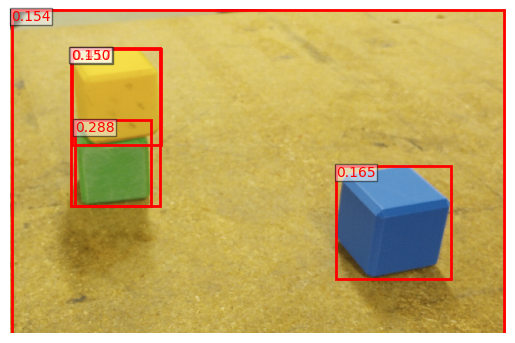

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import requests
from PIL import Image
from io import BytesIO

# Bounding box coordinates and confidence levels
# boxes = [
#     [341.67, 23.39, 642.32, 371.35, 0.614],
#     [6.75, 51.96, 326.62, 473.13, 0.665]
# ]

boxes = [b.tolist() + [s] for b, s in zip(boxes, scores.tolist())]

img = image

# Plot the image
fig, ax = plt.subplots(1)
ax.imshow(img)

# Add bounding boxes
for box in boxes:
    x1, y1, x2, y2, confidence = box
    width = x2 - x1
    height = y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(x1, y1, f'{confidence:.3f}', color='red', verticalalignment='top', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 1})

plt.axis('off')
plt.show()

In [3]:
!pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110459 sha256=e234c565ab6cedbc2f9cfaa68b13cdde36e5228dc25a6d2a1864f573d9805e8e
  Stored in directory: /home/wxie/.cache/pip/wheels/12/dc/3c/e12983eac132d00f82a20c6cbe7b42ce6e96190ef8fa2d15e1
Successfully built filterpy


In [4]:
import sys
sys.path.append("../")
from magpie.perception.label_owlvit import LabelOWLViT
path = "google/owlvit-base-patch32"
label_vit = LabelOWLViT(pth=path, topk=3)

2024-07-30 11:02:03.644948: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 11:02:03.644990: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 11:02:03.646026: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-30 11:02:03.653071: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-30 11:02:06.206089: W tensorflow/compiler/tf2

model.safetensors:   0%|          | 0.00/613M [00:00<?, ?B/s]

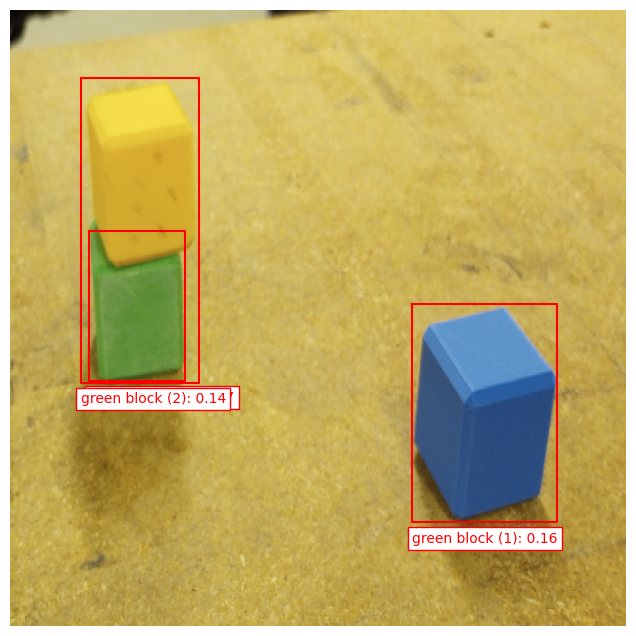

In [11]:
import numpy as np
label_vit.set_threshold(0.001)
image = np.array(image)
queries = ["a photo of a green block"]
abbrevq = ["green block"]
bboxes, uboxes = label_vit.label(image, queries, abbrevq, plot=True, topk=True)


In [12]:
bboxes

[([0.48476483672857285,
   0.18550999835133553,
   68.32765128463507,
   29.101728167384863],
  'green block'),
 ([33.07115979492664,
   -0.07721375674009323,
   63.9168905466795,
   6.916184172034264],
  'green block'),
 ([38.222758043557405,
   -7.651373744010925e-05,
   67.82954437658191,
   6.7085462380200624],
  'green block'),
 ([43.169306963682175,
   0.253014650195837,
   221.2185661494732,
   24.375277623534203],
  'green block'),
 ([-3.3182483911514282,
   0.2027076818048954,
   340.4162794351578,
   35.26627719774842],
  'green block'),
 ([2.291097342967987,
   -0.14974715188145638,
   385.05788415670395,
   54.19734193012118],
  'green block'),
 ([279.7043688222766,
   -0.03870720090344548,
   306.9375543668866,
   5.519368306268007],
  'green block'),
 ([279.56161327660084,
   0.03336487337946892,
   359.74358074367046,
   7.144707100465894],
  'green block'),
 ([-9.217243492603302,
   0.6880115270614624,
   655.7585600018501,
   40.7495006993413],
  'green block'),
 ([329